# Capstone Check in 2

-----------------------
##  Main goal of the project (problem statement)

1. **Generate a unique cooking recipe from machine learing.**<br>
   After analyzing hundreds of thousands of recipes and reviews, computer should be able to generate its own recipes, expected to have the best ratings.

2. **What to cook for breakfast/lunch/dinner?** <br>
    Given certain ingradients and limit of cook time, computer should give several suggestings about what to cook.
    
    
## Outlines of the proposed methods and models

The primary tools used were Pandas, Numpy, Seaborn, and
Unsupervised learing. The dataset used was acquired from Food.com (formerly GeniusKitchen). This dataset consists of 170K+ recipes and 1M+ recipe reviews covering 18 years of user interactions and uploads on Food.com (formerly GeniusKitchen). Pandas will be heavily used to explore and preprocess the dataset, and Seaborn and matplotlibs
for visualizations.

## Defines the risks & assumptions of your data

The dataset is large, over 800 MB storage and over 170 rows. It may take too long time to do machine learning or even just load the whole dataset. My computer only has 8GB of memory and dual-core i5 CPU. I will check if GA has cloud computering service.  I may have to choose a subset as study if the speed is unbearable for the whole dataset. I can choose to study vegetarian recipes, or cake recipes only. 

## Revises initial goals & success criteria, as needed
N/A

## Documents your data source

This dataset consists of 180K+ recipes and 700K+ recipe reviews covering 18 years of user interactions and uploads on Food.com (formerly GeniusKitchen). used in the following paper:

Generating Personalized Recipes from Historical User Preferences

Bodhisattwa Prasad Majumder, Shuyang Li, Jianmo Ni, Julian McAuley

EMNLP, 2019

https://www.aclweb.org/anthology/D19-1613/



## Performs & summarizes preliminary EDA of your data

**NOTE: the actual dataset is too large to upload to the git hub server.  
See https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions for data file**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Code adapted from  https://www.kaggle.com/zinayida/data-exploration-feature-engineering-pipeline

r_recipes = pd.read_csv('RAW_recipes.csv')
test = pd.read_csv('interactions_test.csv')
train = pd.read_csv('interactions_train.csv')
validation = pd.read_csv('interactions_validation.csv')

In [3]:
r_recipes = r_recipes[['id', 'ingredients', 'nutrition', 'n_steps', 'n_ingredients']]
r_recipes.columns = ['recipe_id', 'ingredients', 'nutrition', 'n_steps', 'n_ingredients']
r_recipes = r_recipes.set_index('recipe_id')
r_recipes.head()

,ingredients,nutrition,n_steps,n_ingredients
recipe_id,,,,
137739,"['winter squash', 'mexican seasoning', 'mixed ...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,7
31490,"['prepared pizza crust', 'sausage patty', 'egg...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,6
112140,"['ground beef', 'yellow onions', 'diced tomato...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,13
59389,"['spreadable cheese with garlic and herbs', 'n...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,11
44061,"['tomato juice', 'apple cider vinegar', 'sugar...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,8


In [4]:
train = pd.concat([train[['user_id', 'recipe_id', 'rating']], validation[['user_id', 'recipe_id', 'rating']]], axis = 0)

train_rating = pd.DataFrame(train.groupby(['recipe_id']).mean()['rating'])
test_rating = pd.DataFrame(test.groupby(['recipe_id']).mean()['rating'])

recipes_rating_train = r_recipes.join(train_rating, how = 'inner')
recipes_rating_test = r_recipes.join(test_rating, how = 'inner')

recipes_rating_train['rating'] = recipes_rating_train['rating'].apply(lambda x: round(x))
recipes_rating_test['rating'] = recipes_rating_test['rating'].apply(lambda x: round(x))

print(f'traing dataset shape: {recipes_rating_train.shape}')
print(f'testing dataset shape: {recipes_rating_test.shape}')

traing dataset shape: (167522, 5)
testing dataset shape: (11695, 5)


In [5]:

def avoidRowsWithMissValues(df):
  if(df.isnull().values.any()): 
    columns = df.columns
    for column in columns: 
      df[df[column].isnull()] = ""
      df[df[column]=='NaN'] = ""
      df[pd.isna(df[column])] = ""
  return df

recipes_rating_train = avoidRowsWithMissValues(recipes_rating_train)
recipes_rating_test = avoidRowsWithMissValues(recipes_rating_test)


print(f'traing dataset shape: {recipes_rating_train.drop_duplicates().shape}')
print(f'testing dataset shape: {recipes_rating_test.drop_duplicates().shape}')

traing dataset shape: (167500, 5)
testing dataset shape: (11695, 5)


In [6]:
recipes_rating_train.head()

,ingredients,nutrition,n_steps,n_ingredients,rating
recipe_id,,,,,
137739,"['winter squash', 'mexican seasoning', 'mixed ...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,7,5
31490,"['prepared pizza crust', 'sausage patty', 'egg...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,6,3
59389,"['spreadable cheese with garlic and herbs', 'n...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,11,4
5289,"['milk', 'vanilla ice cream', 'frozen apple ju...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,4,5
25274,"['fennel seeds', 'green olives', 'ripe olives'...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,9,2


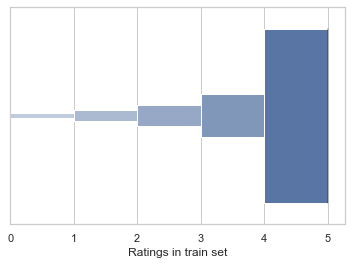

In [7]:
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = recipes_rating_train['rating'])
ax.set_xticks(np.arange(0,6))
ax.set_xlabel('Ratings in train set')
plt.show()

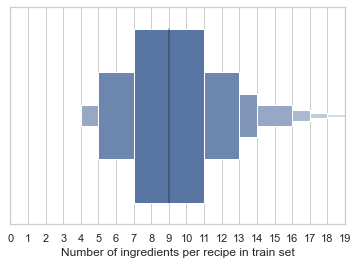

In [8]:
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = recipes_rating_train['n_ingredients'])
ax.set_xticks(np.arange(0,20))
ax.set_xlabel('Number of ingredients per recipe in train set')
plt.show()